In [1]:
import pandas as pd
import os

# Define all uploaded filenames categorized by device, site, and model
file_map = {
    "Jetson Nano": {
        "FD": {
            "MobileSAM": "nano_merged_inference_metrics_fd_mobileSAM.csv",
            "SegFormer": "nano_merged_inference_metrics_fd_segformer.csv"
        },
        "BSF": {
            "MobileSAM": "nano_merged_inference_metrics_BSF_mobileSAM.csv",
            "SegFormer": "nano_merged_inference_metrics_BSF_segformer.csv"
        }
    },
    "Jetson Orin Nano": {
        "FD": {
            "MobileSAM": "orinNano_merged_inference_metrics_FD_mobileSAM.csv",
            "SAM": "orinNano_merged_inference_metrics_FD_SAM.csv",
            "SegFormer": "orinNano_merged_inference_metrics_FD_segformer.csv"
        },
        "BSF": {
            "MobileSAM": "orinNano_merged_inference_metrics_BSF_mobileSAM.csv",
            "SAM": "orinNano_merged_inference_metrics_BSF_SAM.csv",
            "SegFormer": "orinNano_merged_inference_metrics_BSF_segformer.csv"
        }
    },
    "LattePanda": {
        "FD": {
            "MobileSAM": "lattepanda_metrics_FD_mobileSAM.csv",
            "SAM": "lattepanda_metrics_FD_SAM.csv",
            "SegFormer": "lattepanda_metrics_FD_segformer.csv"
        },
        "BSF": {
            "MobileSAM": "lattepanda_metrics_BSF_mobileSAM.csv",
            "SAM": "lattepanda_metrics_BSF_SAM.csv",
            "SegFormer": "lattepanda_metrics_BSF_segformer.csv"
        }
    },
    "Raspberry Pi": {
        "FD": {
            "MobileSAM": "rpi5_metrics_FD_mobileSAM.csv",
            "SAM": "rpi5_metrics_FD_SAM.csv",
            "SegFormer": "segformer_rpi5_metrics_FD.csv"
        },
        "BSF": {
            "MobileSAM": "rpi5_metrics_BSF_mobileSAM.csv",
            "SAM": "rpi5_metrics_BSF_SAM.csv",
            "SegFormer": "segformer_rpi5_metrics_BSF.csv"
        }
    }
}

# Function to load and tag data with metadata
def load_tagged_data(device, site, model, filepath):
    df = pd.read_csv(filepath)
    df["Device"] = device
    df["Site"] = site
    df["Model"] = model
    return df

# Load all files
all_data = []
base_path = "/content/drive/MyDrive/CIROH_UWRL/edge_test/analysis/"
for device, sites in file_map.items():
    for site, models in sites.items():
        for model, filename in models.items():
            filepath = os.path.join(base_path, filename)
            df = load_tagged_data(device, site, model, filepath)
            all_data.append(df)

# Combine all into one dataframe
combined_df = pd.concat(all_data, ignore_index=True)


In [2]:
combined_df

,Timestamp,RAM_MB,CPU_Load,GR3D_FREQ,EMC_FREQ,Power_Total_mW,Power_CPU_mW,Power_GPU_mW,Temp_CPU_C,Temp_GPU_C,...,Device,Site,Model,CPU_Usage,Energy_uJ_Total,Instant_Power_mW,CPU_Freq_MHz,Voltage_V,Estimated_Power_Index,Peak_Mem_MB
0,2025-05-13 00:38:58+00:00,2986.00,"10%@1479,49%@1479,30%@1479,25%@1479",85%@153,3%@1600,3724.0,1026.0,171.0,41.50,39.5,...,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-13 00:38:59+00:00,3018.00,"12%@403,28%@403,3%@403,19%@403",0%@230,3%@1600,2674.0,215.0,43.0,41.50,39.5,...,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-13 00:38:59+00:00,3019.00,"17%@204,16%@204,15%@204,15%@204",0%@230,3%@1600,2631.0,301.0,43.0,41.00,39.5,...,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-05-13 00:39:00+00:00,3037.00,"38%@1479,32%@1479,19%@1479,18%@1479",0%@230,3%@1600,4091.0,1574.0,85.0,42.00,39.5,...,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-13 00:39:00+00:00,3054.00,"36%@1479,24%@1479,19%@1479,17%@1479",0%@230,3%@1600,3306.0,943.0,42.0,41.50,39.5,...,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25338,2025-05-14 05:26:46.293802,1092.31,NaN,NaN,NaN,NaN,NaN,NaN,54.00,NaN,...,Raspberry Pi,BSF,SegFormer,0.0,NaN,NaN,1500.0,0.858,NaN,NaN
25339,2025-05-14 05:26:47.301162,1092.31,NaN,NaN,NaN,NaN,NaN,NaN,53.45,NaN,...,Raspberry Pi,BSF,SegFormer,0.0,NaN,NaN,1500.0,0.720,NaN,NaN
25340,2025-05-14 05:26:48.308322,1092.31,NaN,NaN,NaN,NaN,NaN,NaN,54.00,NaN,...,Raspberry Pi,BSF,SegFormer,0.2,NaN,NaN,1500.0,0.720,0.0022,NaN
25341,2025-05-14 05:26:49.315610,1092.31,NaN,NaN,NaN,NaN,NaN,NaN,53.45,NaN,...,Raspberry Pi,BSF,SegFormer,0.0,NaN,NaN,1500.0,0.720,NaN,NaN


In [3]:
# Step 1: Drop text-heavy and non-numeric fields that are hard to normalize or not useful for analysis
columns_to_drop = [
    "CPU_Load", "GR3D_FREQ", "EMC_FREQ", "Image", "Estimated_Power_Index", "Timestamp", "ROI1_pixels", "ROI2_pixels"
]

# Drop columns
cleaned_df = combined_df.drop(columns=columns_to_drop, errors="ignore")

# Step 2: Keep only rows where we have either energy or power or inference time
# We'll filter later for "during" or "idle" but keep both for now
# Focus on rows that are meaningful for at least one main metric
valid_rows_mask = (
    cleaned_df["Inference_time_sec"].notna() |
    cleaned_df["Instant_Power_mW"].notna() |
    cleaned_df["Energy_uJ_Total"].notna()
)
cleaned_df = cleaned_df[valid_rows_mask].copy()

# Step 3: Ensure types are consistent
numeric_columns = [
    "RAM_MB", "Power_Total_mW", "Power_CPU_mW", "Power_GPU_mW", "Temp_CPU_C",
    "Temp_GPU_C", "Inference_time_sec", "Peak_GPU_Mem_MB",
    "CPU_Usage", "Energy_uJ_Total", "Instant_Power_mW", "CPU_Freq_MHz", "Voltage_V",
    "Peak_Mem_MB"
]

# Convert to numeric where possible
cleaned_df[numeric_columns] = cleaned_df[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Add a new column to mark if it's idle or during inference for easier filtering later
cleaned_df["Phase"] = cleaned_df["Inference_Phase"].str.lower().str.strip()

In [4]:
cleaned_df

,RAM_MB,Power_Total_mW,Power_CPU_mW,Power_GPU_mW,Temp_CPU_C,Temp_GPU_C,Inference_Phase,Inference_time_sec,Peak_GPU_Mem_MB,Device,Site,Model,CPU_Usage,Energy_uJ_Total,Instant_Power_mW,CPU_Freq_MHz,Voltage_V,Peak_Mem_MB,Phase
120,3362.00,2842.0,258.0,172.0,42.00,40.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference
121,3365.00,7789.0,412.0,3950.0,43.00,42.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference
122,3366.00,3639.0,513.0,599.0,42.50,41.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference
123,3346.00,2760.0,258.0,129.0,42.00,40.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference
124,3347.00,2674.0,215.0,129.0,41.50,40.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25312,1094.69,NaN,NaN,NaN,59.50,NaN,During_Inference,13.079,NaN,Raspberry Pi,BSF,SegFormer,5.8,NaN,NaN,2400.0,0.858,1077.12,during_inference
25313,1092.09,NaN,NaN,NaN,60.05,NaN,During_Inference,13.079,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,NaN,2400.0,0.858,1077.12,during_inference
25314,1092.33,NaN,NaN,NaN,58.95,NaN,During_Inference,13.079,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,NaN,2400.0,0.858,1077.12,during_inference
25315,1092.33,NaN,NaN,NaN,58.40,NaN,During_Inference,13.079,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,NaN,2400.0,0.858,1077.12,during_inference


In [5]:
# Create a unified power column
cleaned_df["Power_mW"] = cleaned_df["Power_Total_mW"].combine_first(cleaned_df["Instant_Power_mW"])

# Drop redundant columns
cleaned_df.drop(columns=["Power_Total_mW", "Instant_Power_mW", "Voltage_V"], inplace=True, errors="ignore")

In [6]:
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df

,RAM_MB,Power_CPU_mW,Power_GPU_mW,Temp_CPU_C,Temp_GPU_C,Inference_Phase,Inference_time_sec,Peak_GPU_Mem_MB,Device,Site,Model,CPU_Usage,Energy_uJ_Total,CPU_Freq_MHz,Peak_Mem_MB,Phase,Power_mW
0,3362.00,258.0,172.0,42.00,40.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,during_inference,2842.0
1,3365.00,412.0,3950.0,43.00,42.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,during_inference,7789.0
2,3366.00,513.0,599.0,42.50,41.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,during_inference,3639.0
3,3346.00,258.0,129.0,42.00,40.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,during_inference,2760.0
4,3347.00,215.0,129.0,41.50,40.0,During_Inference,71.004,284.24,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,during_inference,2674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13686,1094.69,NaN,NaN,59.50,NaN,During_Inference,13.079,NaN,Raspberry Pi,BSF,SegFormer,5.8,NaN,2400.0,1077.12,during_inference,NaN
13687,1092.09,NaN,NaN,60.05,NaN,During_Inference,13.079,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,2400.0,1077.12,during_inference,NaN
13688,1092.33,NaN,NaN,58.95,NaN,During_Inference,13.079,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,2400.0,1077.12,during_inference,NaN
13689,1092.33,NaN,NaN,58.40,NaN,During_Inference,13.079,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,2400.0,1077.12,during_inference,NaN


In [7]:
# Normalize inference phase
combined_df["Inference_Phase"] = combined_df["Inference_Phase"].astype(str).str.lower().str.strip()
combined_df["Phase"] = combined_df["Inference_Phase"]

# Show number of phase types per device now
phase_check = combined_df.groupby(["Device", "Phase"]).size().reset_index(name="Count")

phase_check

,Device,Phase,Count
0,Jetson Nano,during_inference,2980
1,Jetson Nano,idle,2187
2,Jetson Orin Nano,during_inference,4635
3,Jetson Orin Nano,idle,1239
4,LattePanda,during_inference,1824
5,LattePanda,idle,216
6,Raspberry Pi,during_inference,4036
7,Raspberry Pi,idle,8226


In [8]:
output_path = "raw_combined_metrics_full.csv"
combined_df.to_csv(output_path, index=False)

In [18]:
# Start by copying the combined_df so we preserve the original
cleaned_df = combined_df.copy()

# Drop unnecessary or inconsistent columns
columns_to_drop = [
    "CPU_Load", "GR3D_FREQ", "EMC_FREQ", "Image", "Estimated_Power_Index", "Timestamp",
    "ROI1_pixels", "ROI2_pixels", "Instant_Power_mW", "Power_Total_mW", "Voltage_V"
]
cleaned_df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

# Normalize numeric columns
numeric_columns = [
    "RAM_MB", "Power_CPU_mW", "Power_GPU_mW", "Temp_CPU_C", "Temp_GPU_C", "Inference_time_sec",
    "Peak_GPU_Mem_MB", "CPU_Usage", "Energy_uJ_Total", "CPU_Freq_MHz", "Peak_Mem_MB"
]

# Ensure correct types
cleaned_df[numeric_columns] = cleaned_df[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Create unified power column
if "Power_Total_mW" in combined_df.columns and "Instant_Power_mW" in combined_df.columns:
    cleaned_df["Power_mW"] = combined_df["Power_Total_mW"].combine_first(combined_df["Instant_Power_mW"])
elif "Power_Total_mW" in combined_df.columns:
    cleaned_df["Power_mW"] = combined_df["Power_Total_mW"]
elif "Instant_Power_mW" in combined_df.columns:
    cleaned_df["Power_mW"] = combined_df["Instant_Power_mW"]

# Normalize inference phase field again just in case
cleaned_df["Inference_Phase"] = cleaned_df["Inference_Phase"].astype(str).str.lower().str.strip()
cleaned_df["Phase"] = cleaned_df["Inference_Phase"]

# Reset index
cleaned_df.reset_index(drop=True, inplace=True)

In [19]:
cleaned_df

,RAM_MB,Power_CPU_mW,Power_GPU_mW,Temp_CPU_C,Temp_GPU_C,Inference_Phase,Inference_time_sec,Peak_GPU_Mem_MB,Device,Site,Model,CPU_Usage,Energy_uJ_Total,CPU_Freq_MHz,Peak_Mem_MB,Phase,Power_mW
0,2986.00,1026.0,171.0,41.50,39.5,idle,NaN,NaN,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,idle,3724.0
1,3018.00,215.0,43.0,41.50,39.5,idle,NaN,NaN,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,idle,2674.0
2,3019.00,301.0,43.0,41.00,39.5,idle,NaN,NaN,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,idle,2631.0
3,3037.00,1574.0,85.0,42.00,39.5,idle,NaN,NaN,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,idle,4091.0
4,3054.00,943.0,42.0,41.50,39.5,idle,NaN,NaN,Jetson Nano,FD,MobileSAM,NaN,NaN,NaN,NaN,idle,3306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25338,1092.31,NaN,NaN,54.00,NaN,idle,NaN,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,1500.0,NaN,idle,NaN
25339,1092.31,NaN,NaN,53.45,NaN,idle,NaN,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,1500.0,NaN,idle,NaN
25340,1092.31,NaN,NaN,54.00,NaN,idle,NaN,NaN,Raspberry Pi,BSF,SegFormer,0.2,NaN,1500.0,NaN,idle,NaN
25341,1092.31,NaN,NaN,53.45,NaN,idle,NaN,NaN,Raspberry Pi,BSF,SegFormer,0.0,NaN,1500.0,NaN,idle,NaN


In [20]:
import pandas as pd

# === Load CSV ===
df = pd.read_csv("raw_combined_metrics_full.csv")

# === Normalize phase column ===
df["Inference_Phase"] = df["Inference_Phase"].astype(str).str.lower().str.strip()
df["Phase"] = df["Inference_Phase"]

# === Convert relevant columns to numeric ===
numeric_columns = [
    "RAM_MB", "Power_CPU_mW", "Power_GPU_mW", "Temp_CPU_C", "Temp_GPU_C", "Inference_time_sec",
    "Peak_GPU_Mem_MB", "CPU_Usage", "Energy_uJ_Total", "CPU_Freq_MHz", "Peak_Mem_MB",
    "Power_Total_mW", "Instant_Power_mW", "Estimated_Power_Index"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

# === Create unified Power_mW column ===
df["Power_mW"] = df["Power_Total_mW"].combine_first(df["Instant_Power_mW"])

# === Fill Power_mW for Raspberry Pi using Estimated_Power_Index if missing ===
mask_rpi_missing_power = (df["Device"] == "Raspberry Pi") & (df["Power_mW"].isna())
df.loc[mask_rpi_missing_power, "Power_mW"] = df.loc[mask_rpi_missing_power, "Estimated_Power_Index"] * 1000

# Drop irrelevant columns for the updated dataframe (with RPi power estimation)
drop_cols = [
    "CPU_Load", "GR3D_FREQ", "EMC_FREQ", "Image", "Timestamp",
    "ROI1_pixels", "ROI2_pixels", "Voltage_V"
]
df.drop(columns=drop_cols, inplace=True, errors="ignore")

# Recreate Power_mW using RPi's Estimated_Power_Index where missing
mask_rpi_missing_power = (df["Device"] == "Raspberry Pi") & (df["Power_mW"].isna())
df.loc[mask_rpi_missing_power, "Power_mW"] = df.loc[mask_rpi_missing_power, "Estimated_Power_Index"] * 1000

# Grouped summary with updated values
summary_df = (
    df.groupby(["Device", "Model", "Site", "Phase"], as_index=False)
    .agg({
        "Inference_time_sec": "mean",
        "RAM_MB": "mean",
        "CPU_Usage": "mean",
        "Power_mW": "mean",
        "Power_CPU_mW": "mean",
        "Power_GPU_mW": "mean",
        "Temp_CPU_C": "mean",
        "Temp_GPU_C": "mean",
        "Peak_GPU_Mem_MB": "mean",
        "Peak_Mem_MB": "mean",
        "Energy_uJ_Total": "mean",
        "CPU_Freq_MHz": "mean"
    })
    .round(2)
)

summary_df

,Device,Model,Site,Phase,Inference_time_sec,RAM_MB,CPU_Usage,Power_mW,Power_CPU_mW,Power_GPU_mW,Temp_CPU_C,Temp_GPU_C,Peak_GPU_Mem_MB,Peak_Mem_MB,Energy_uJ_Total,CPU_Freq_MHz
0,Jetson Nano,MobileSAM,BSF,during_inference,2.76,3545.81,NaN,5427.89,932.81,1921.14,47.18,45.44,284.24,NaN,NaN,NaN
1,Jetson Nano,MobileSAM,BSF,idle,NaN,3505.94,NaN,2740.70,372.06,89.03,41.44,39.56,NaN,NaN,NaN,NaN
2,Jetson Nano,MobileSAM,FD,during_inference,2.59,3415.05,NaN,5673.94,865.10,2209.44,50.30,48.48,284.24,NaN,NaN,NaN
3,Jetson Nano,MobileSAM,FD,idle,NaN,3344.18,NaN,2911.59,543.31,83.75,44.51,42.51,NaN,NaN,NaN,NaN
4,Jetson Nano,SegFormer,BSF,during_inference,35.33,3410.36,NaN,6967.24,960.82,3141.08,57.01,55.52,NaN,NaN,NaN,NaN
5,Jetson Nano,SegFormer,BSF,idle,NaN,3411.67,NaN,5764.12,843.49,2334.91,60.37,58.84,NaN,NaN,NaN,NaN
6,Jetson Nano,SegFormer,FD,during_inference,27.61,3414.73,NaN,6942.57,901.85,3209.85,53.30,51.51,NaN,NaN,NaN,NaN
7,Jetson Nano,SegFormer,FD,idle,NaN,3421.23,NaN,5649.20,773.49,2319.49,58.11,56.23,NaN,NaN,NaN,NaN
8,Jetson Orin Nano,MobileSAM,BSF,during_inference,0.96,2950.94,NaN,6318.52,1461.13,1461.13,51.62,52.16,292.96,NaN,NaN,NaN
9,Jetson Orin Nano,MobileSAM,BSF,idle,NaN,2971.82,NaN,4476.79,462.14,462.14,51.60,52.08,NaN,NaN,NaN,NaN


In [21]:
df[df["Inference_time_sec"] > 60].sort_values("Inference_time_sec")

,RAM_MB,Power_Total_mW,Power_CPU_mW,Power_GPU_mW,Temp_CPU_C,Temp_GPU_C,Inference_Phase,Inference_time_sec,Peak_GPU_Mem_MB,Device,Site,Model,CPU_Usage,Energy_uJ_Total,Instant_Power_mW,CPU_Freq_MHz,Estimated_Power_Index,Peak_Mem_MB,Phase,Power_mW
2644,3586.0,4822.0,211.0,1565.0,37.5,35.5,during_inference,66.910,284.24,Jetson Nano,BSF,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,4822.0
2645,3587.0,7370.0,289.0,3762.0,38.0,37.0,during_inference,66.910,284.24,Jetson Nano,BSF,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,7370.0
2646,3588.0,6707.0,208.0,3296.0,38.0,37.0,during_inference,66.910,284.24,Jetson Nano,BSF,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,6707.0
2647,3591.0,2748.0,214.0,128.0,37.0,35.5,during_inference,66.910,284.24,Jetson Nano,BSF,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,2748.0
2643,3586.0,3039.0,256.0,342.0,37.0,35.0,during_inference,66.910,284.24,Jetson Nano,BSF,MobileSAM,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,3039.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,3475.0,2877.0,257.0,85.0,42.5,41.5,during_inference,119.837,NaN,Jetson Nano,BSF,SegFormer,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,2877.0
3642,3477.0,2834.0,257.0,85.0,42.5,41.0,during_inference,119.837,NaN,Jetson Nano,BSF,SegFormer,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,2834.0
3641,3476.0,4285.0,212.0,1145.0,43.0,42.0,during_inference,119.837,NaN,Jetson Nano,BSF,SegFormer,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,4285.0
3448,3222.0,2619.0,128.0,42.0,41.0,39.5,during_inference,119.837,NaN,Jetson Nano,BSF,SegFormer,NaN,NaN,NaN,NaN,NaN,NaN,during_inference,2619.0


In [16]:
from scipy.stats import zscore

# Calculate z-scores for each group (by Model + Device)
df["z"] = df.groupby(["Device", "Model"])["Inference_time_sec"].transform(
    lambda x: zscore(x, nan_policy="omit")
)

# Filter out rows where z-score is above 2 or below -2
df_filtered = df[(df["z"].abs() <= 2) | (df["z"].isna())]


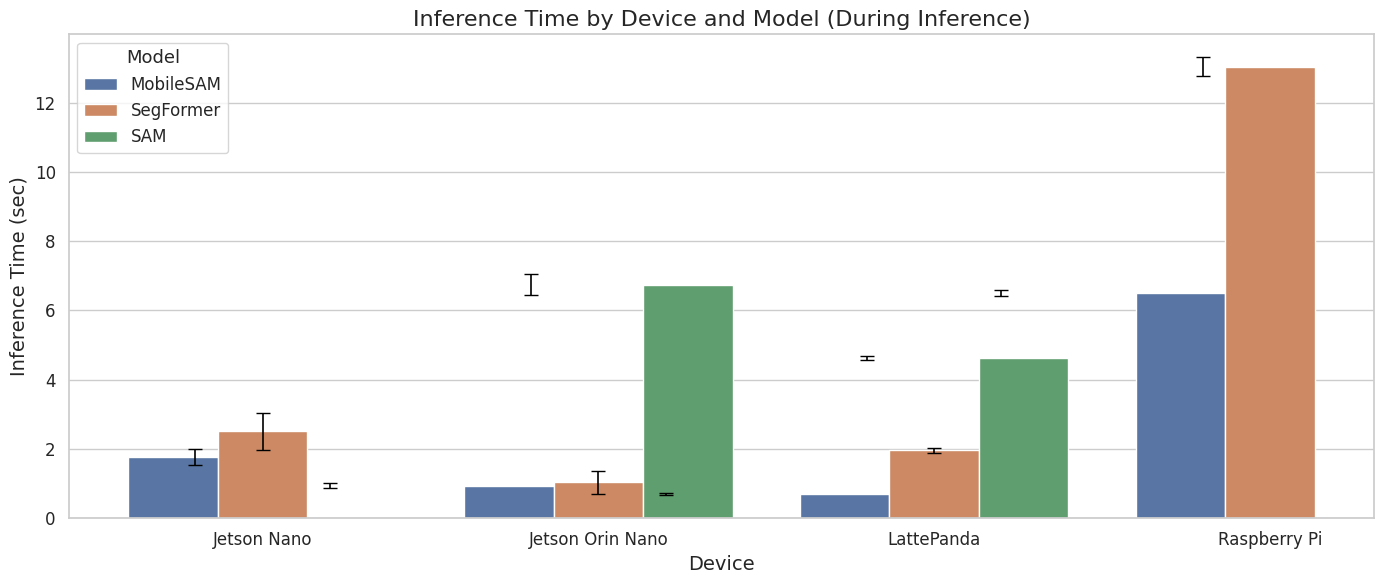

KeyError: 'Column not found: Power_mW'

<Figure size 1400x600 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data
df = pd.read_csv("raw_combined_metrics_full.csv")

# Filter for 'during_inference' only
df = df[df["Phase"] == "during_inference"].copy()

# Remove outliers from 'Inference_time_sec' using IQR
Q1 = df["Inference_time_sec"].quantile(0.25)
Q3 = df["Inference_time_sec"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Inference_time_sec"] >= lower_bound) & (df["Inference_time_sec"] <= upper_bound)]

# Sort model order: SAM at right
model_order = ["MobileSAM", "SegFormer", "SAM"]
device_order = ["Jetson Nano", "Jetson Orin Nano", "LattePanda", "Raspberry Pi"]

# Create output directory
os.makedirs("bar_charts", exist_ok=True)

# Plotting function
def save_metric_bar_manual(metric: str, ylabel: str, title: str, filename: str):
    plt.figure(figsize=(14, 6))
    sns.set(style="whitegrid")

    # Compute means and stds
    stats = df.groupby(["Device", "Model"])[metric].agg(["mean", "std"]).reset_index()
    stats["Device"] = pd.Categorical(stats["Device"], categories=device_order, ordered=True)
    stats["Model"] = pd.Categorical(stats["Model"], categories=model_order, ordered=True)
    stats = stats.sort_values(["Device", "Model"])

    # Draw barplot manually
    ax = sns.barplot(data=stats, x="Device", y="mean", hue="Model", order=device_order, hue_order=model_order)

    # Add error bars manually
    for i, row in stats.iterrows():
        ax.errorbar(
            x=i // len(model_order) + (i % len(model_order)) * 0.2 - 0.2,
            y=row["mean"],
            yerr=row["std"],
            fmt='none',
            ecolor='black',
            capsize=5,
            linewidth=1.2
        )

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Device", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(title="Model", fontsize=12, title_fontsize=13)
    plt.tight_layout()
    plt.savefig(f"bar_charts/{filename}.png", dpi=300, bbox_inches='tight')
    plt.show()

# Create plots
save_metric_bar_manual("Inference_time_sec", "Inference Time (sec)", "Inference Time by Device and Model (During Inference)", "inference_time")
save_metric_bar_manual("Power_mW", "Power Consumption (mW)", "Power Consumption by Device and Model (During Inference)", "power_consumption")
save_metric_bar_manual("RAM_MB", "RAM Usage (MB)", "RAM Usage by Device and Model (During Inference)", "ram_usage")
save_metric_bar_manual("Temp_CPU_C", "CPU Temperature (°C)", "CPU Temperature by Device and Model (During Inference)", "cpu_temperature")


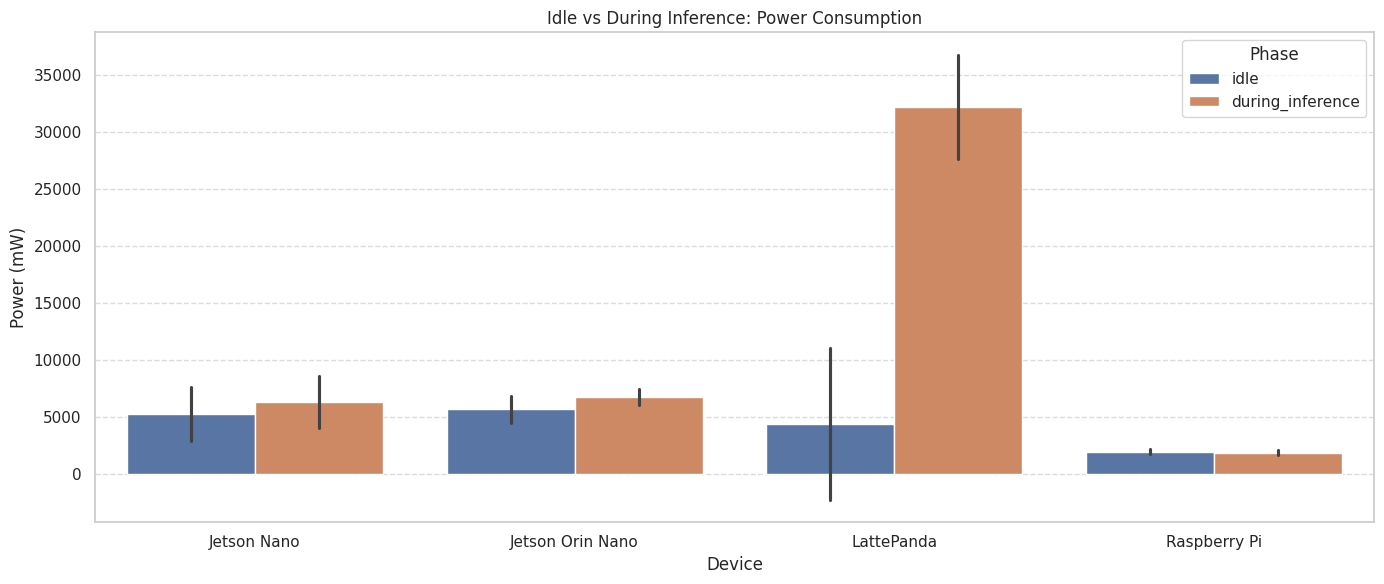

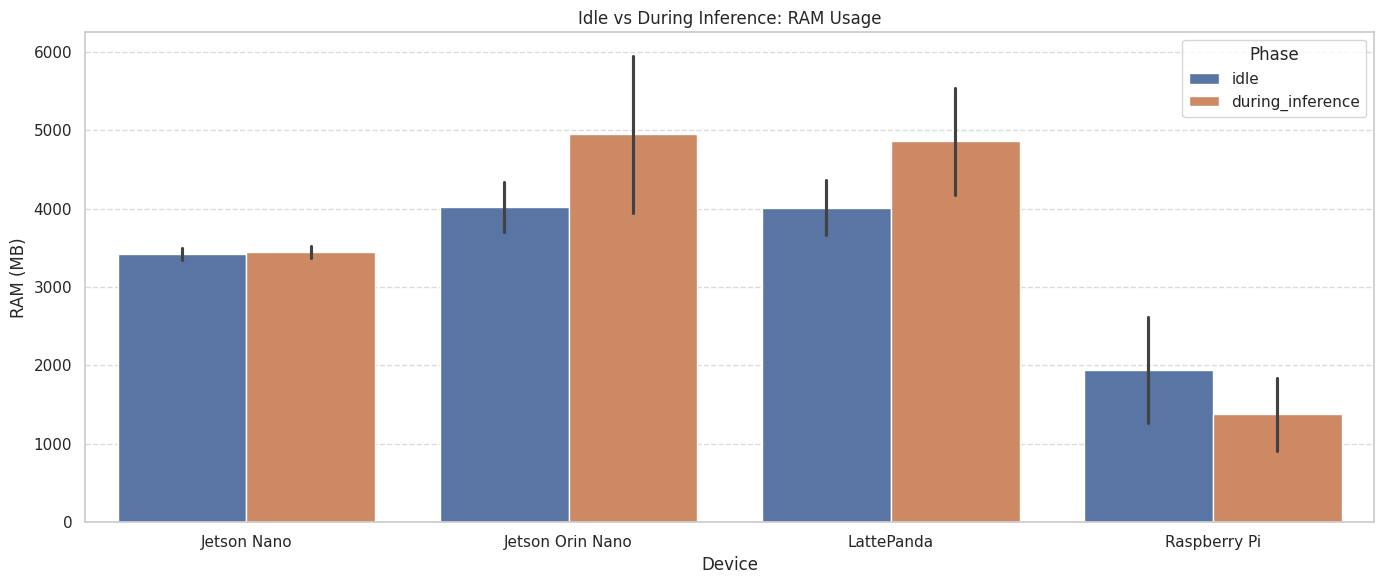

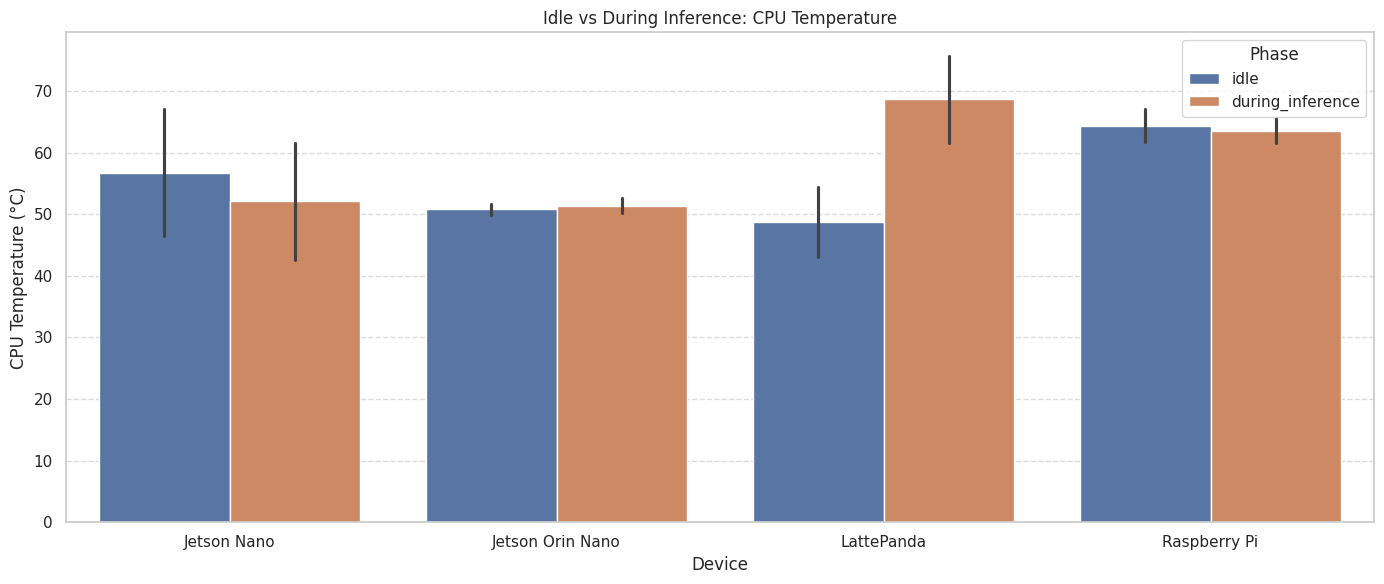

'/content/Idle_vs_During_Bar_Charts.zip'

In [23]:
import shutil
# Filter for idle and during phases
comparison_df = df[df["Phase"].isin(["idle", "during_inference"])].copy()

# Create output directory
os.makedirs("idle_during_bar_charts", exist_ok=True)

# Plot and save function
def save_idle_vs_during(metric: str, ylabel: str, title: str, filename: str):
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=comparison_df,
        x="Device",
        y=metric,
        hue="Phase",
        errorbar="sd"
    )
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Device")
    plt.legend(title="Phase")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks()
    plt.tight_layout()
    plt.savefig(f"idle_during_bar_charts/{filename}.png", dpi=300)
    plt.show()
    plt.close()

# Generate and save all plots
save_idle_vs_during("Power_mW", "Power (mW)", "Idle vs During Inference: Power Consumption", "power_comparison")
save_idle_vs_during("RAM_MB", "RAM (MB)", "Idle vs During Inference: RAM Usage", "ram_comparison")
save_idle_vs_during("Temp_CPU_C", "CPU Temperature (°C)", "Idle vs During Inference: CPU Temperature", "temp_comparison")

# Create ZIP file
shutil.make_archive("Idle_vs_During_Bar_Charts", 'zip', "idle_during_bar_charts")

/tmp/ipython-input-30-35956498.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")


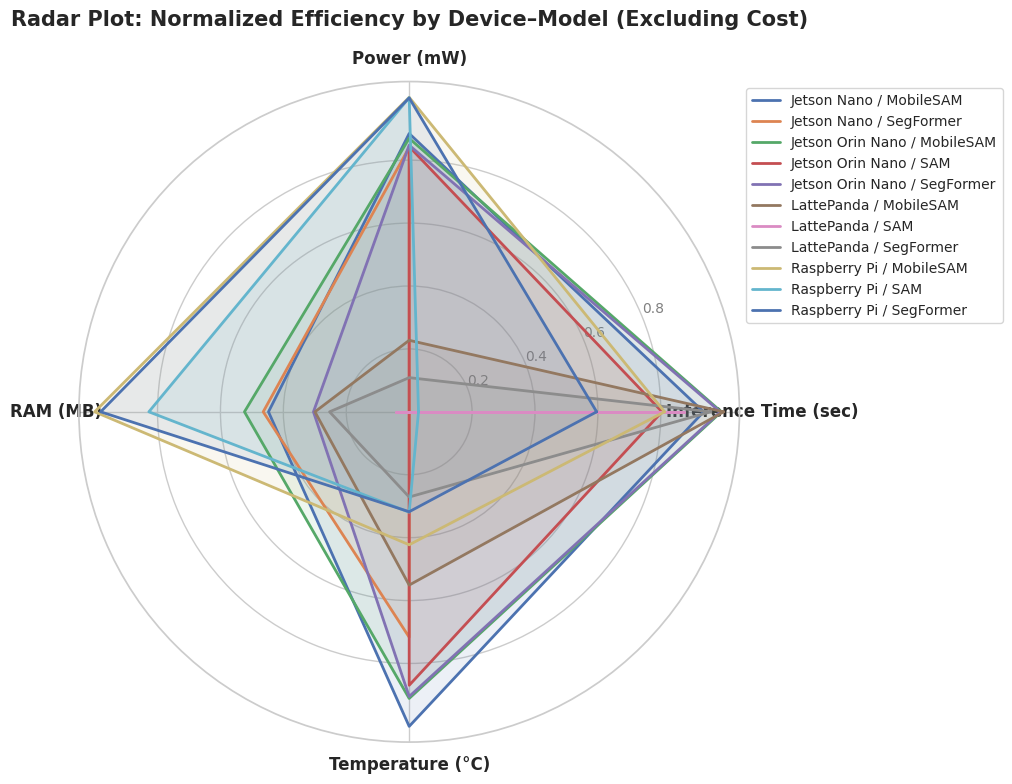

In [30]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from math import pi

# Define improved radar plot with styling
def radar_plot(df, metrics, labels, title="Radar Plot: Normalized Efficiency by Device–Model (Excluding Cost)"):
     # Normalize metrics: lower is better, so 1 - normalized
    data = df.copy()
    norm_data = data[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    norm_data = 1 - norm_data
    norm_data["Label"] = data["Device"] + " / " + data["Model"]

    # Setup for radar chart
    N = len(labels)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialize plot
    plt.figure(figsize=(10, 8))
    cmap = get_cmap("tab10")

    for i, row in norm_data.iterrows():
        values = row[metrics].tolist()
        values += values[:1]
        plt.polar(angles, values, label=row["Label"], linewidth=2)
        plt.fill(angles, values, alpha=0.1)

    # Add styling
    plt.xticks(angles[:-1], labels, fontsize=12, weight='bold')
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="gray", size=10)
    plt.title(title, size=15, weight='bold', pad=40)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1.0), fontsize=10)
    plt.tight_layout()
    plt.savefig(f"normalized_efficiency.png", dpi=300)
    plt.show()

radar_source = (
    df[df["Phase"] == "during_inference"]
    .groupby(["Device", "Model"], as_index=False)
    .agg({
        "Inference_time_sec": "mean",
        "Power_mW": "mean",
        "RAM_MB": "mean",
        "Temp_CPU_C": "mean"
    })
)

# Call with updated axis labels
radar_metrics = ["Inference_time_sec", "Power_mW", "RAM_MB", "Temp_CPU_C"]
radar_labels = ["Inference Time (sec)", "Power (mW)", "RAM (MB)", "Temperature (°C)"]

radar_plot(radar_source, radar_metrics, radar_labels)

/tmp/ipython-input-33-2597430038.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")


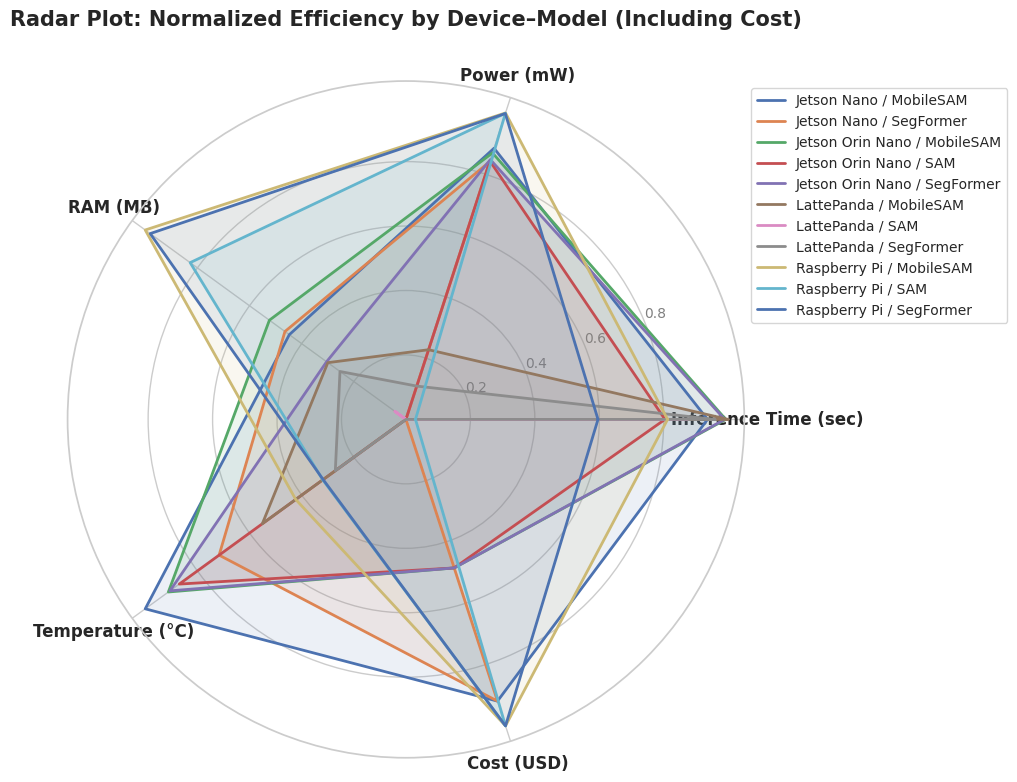

In [33]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from math import pi

# Define improved radar plot with styling
def radar_plot(df, metrics, labels, title="Radar Plot: Normalized Efficiency by Device–Model (Including Cost)"):
    # Normalize metrics: lower is better, so 1 - normalized
    data = df.copy()
    norm_data = data[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    norm_data = 1 - norm_data
    norm_data["Label"] = data["Device"] + " / " + data["Model"]

    # Setup for radar chart
    N = len(labels)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialize plot
    plt.figure(figsize=(10, 8))
    cmap = get_cmap("tab10")

    for i, row in norm_data.iterrows():
        values = row[metrics].tolist()
        values += values[:1]
        plt.polar(angles, values, label=row["Label"], linewidth=2)
        plt.fill(angles, values, alpha=0.1)

    # Add styling
    plt.xticks(angles[:-1], labels, fontsize=12, weight='bold')
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="gray", size=10)
    plt.title(title, size=15, weight='bold', pad=40)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1.0), fontsize=10)
    plt.tight_layout()
    plt.savefig(f"normalized_efficiency_cost.png", dpi=300)
    plt.show()

# Device cost dictionary
device_costs = {
    "Jetson Nano": 130,
    "Jetson Orin Nano": 399,
    "LattePanda": 699,
    "Raspberry Pi": 80
}

# Merge cost into radar_source
radar_source = (
    df[df["Phase"] == "during_inference"]
    .groupby(["Device", "Model"], as_index=False)
    .agg({
        "Inference_time_sec": "mean",
        "Power_mW": "mean",
        "RAM_MB": "mean",
        "Temp_CPU_C": "mean"
    })
)

radar_source["Cost_USD"] = radar_source["Device"].map(device_costs)

# updated metrics
radar_metrics = ["Inference_time_sec", "Power_mW", "RAM_MB", "Temp_CPU_C", "Cost_USD"]
radar_labels = ["Inference Time (sec)", "Power (mW)", "RAM (MB)", "Temperature (°C)", "Cost (USD)"]

# plot
radar_plot(radar_source, radar_metrics, radar_labels)


In [31]:
# Create an efficiency score from normalized values (higher is better)
# We'll use 4 metrics: lower is better, so use 1 - normalized
metrics = ["Inference_time_sec", "Power_mW", "RAM_MB", "Temp_CPU_C"]

# Prepare dataset
eff_df = (
    df[df["Phase"] == "during_inference"]
    .groupby(["Device", "Model"], as_index=False)
    .agg({m: "mean" for m in metrics})
)

# Normalize and invert values
for m in metrics:
    min_val = eff_df[m].min()
    max_val = eff_df[m].max()
    eff_df[f"{m}_score"] = 1 - ((eff_df[m] - min_val) / (max_val - min_val))

# Weighted score (equal weight here, can be adjusted)
eff_df["Efficiency_Score"] = eff_df[[f"{m}_score" for m in metrics]].mean(axis=1)

# Sort by score
eff_df_sorted = eff_df.sort_values(by="Efficiency_Score", ascending=False).reset_index(drop=True)

eff_df_sorted

,Device,Model,Inference_time_sec,Power_mW,RAM_MB,Temp_CPU_C,Inference_time_sec_score,Power_mW_score,RAM_MB_score,Temp_CPU_C_score,Efficiency_Score
0,Jetson Orin Nano,MobileSAM,0.933745,6035.103048,3155.451379,50.687084,0.992418,0.869462,0.523727,0.911232,0.824210
1,Jetson Nano,MobileSAM,2.677681,5542.634670,3484.835244,48.632521,0.935892,0.884793,0.447305,1.000000,0.816998
2,Raspberry Pi,MobileSAM,6.500985,1841.996784,1102.674870,61.993661,0.811967,1.000000,1.000000,0.422726,0.808673
3,Jetson Orin Nano,SegFormer,1.036705,6732.883260,4100.922907,50.828617,0.989081,0.847739,0.304364,0.905117,0.761575
4,Raspberry Pi,SegFormer,13.163221,1904.451443,1184.860206,64.426087,0.596025,0.998056,0.980932,0.317632,0.723161
5,Jetson Orin Nano,SAM,6.749431,6882.259737,5412.758305,51.655685,0.803915,0.843089,0.000000,0.869383,0.629097
6,Raspberry Pi,SAM,30.636451,1877.031081,1845.585658,64.392040,0.029665,0.998909,0.827634,0.319103,0.543828
7,LattePanda,MobileSAM,0.699832,26660.997624,4121.483465,59.027426,1.000000,0.227346,0.299594,0.550884,0.519456
8,Jetson Nano,SegFormer,31.551686,6955.154040,3412.500631,55.191919,0.000000,0.840819,0.464088,0.716598,0.505376
9,LattePanda,SegFormer,1.963488,30472.791400,4322.412240,65.507920,0.959041,0.108679,0.252976,0.270891,0.397897


In [34]:
df["Cost_USD"] = df["Device"].map(device_costs)

# define metrics including cost
metrics = ["Inference_time_sec", "Power_mW", "RAM_MB", "Temp_CPU_C", "Cost_USD"]

# aggregate means
eff_df = (
    df[df["Phase"] == "during_inference"]
    .groupby(["Device", "Model"], as_index=False)
    .agg({m: "mean" for m in metrics})
)

# normalize and invert
for m in metrics:
    min_val = eff_df[m].min()
    max_val = eff_df[m].max()
    eff_df[f"{m}_score"] = 1 - ((eff_df[m] - min_val) / (max_val - min_val))

# weighted mean
eff_df["Efficiency_Score"] = eff_df[[f"{m}_score" for m in metrics]].mean(axis=1)

# sort
eff_df_sorted = eff_df.sort_values(by="Efficiency_Score", ascending=False).reset_index(drop=True)

eff_df_sorted

,Device,Model,Inference_time_sec,Power_mW,RAM_MB,Temp_CPU_C,Cost_USD,Inference_time_sec_score,Power_mW_score,RAM_MB_score,Temp_CPU_C_score,Cost_USD_score,Efficiency_Score
0,Raspberry Pi,MobileSAM,6.500985,1841.996784,1102.674870,61.993661,80.0,0.811967,1.000000,1.000000,0.422726,1.000000,0.846939
1,Jetson Nano,MobileSAM,2.677681,5542.634670,3484.835244,48.632521,130.0,0.935892,0.884793,0.447305,1.000000,0.919225,0.837443
2,Raspberry Pi,SegFormer,13.163221,1904.451443,1184.860206,64.426087,80.0,0.596025,0.998056,0.980932,0.317632,1.000000,0.778529
3,Jetson Orin Nano,MobileSAM,0.933745,6035.103048,3155.451379,50.687084,399.0,0.992418,0.869462,0.523727,0.911232,0.484653,0.756298
4,Jetson Orin Nano,SegFormer,1.036705,6732.883260,4100.922907,50.828617,399.0,0.989081,0.847739,0.304364,0.905117,0.484653,0.706191
5,Raspberry Pi,SAM,30.636451,1877.031081,1845.585658,64.392040,80.0,0.029665,0.998909,0.827634,0.319103,1.000000,0.635062
6,Jetson Orin Nano,SAM,6.749431,6882.259737,5412.758305,51.655685,399.0,0.803915,0.843089,0.000000,0.869383,0.484653,0.600208
7,Jetson Nano,SegFormer,31.551686,6955.154040,3412.500631,55.191919,130.0,0.000000,0.840819,0.464088,0.716598,0.919225,0.588146
8,LattePanda,MobileSAM,0.699832,26660.997624,4121.483465,59.027426,699.0,1.000000,0.227346,0.299594,0.550884,0.000000,0.415565
9,LattePanda,SegFormer,1.963488,30472.791400,4322.412240,65.507920,699.0,0.959041,0.108679,0.252976,0.270891,0.000000,0.318317


/tmp/ipython-input-32-2720935326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


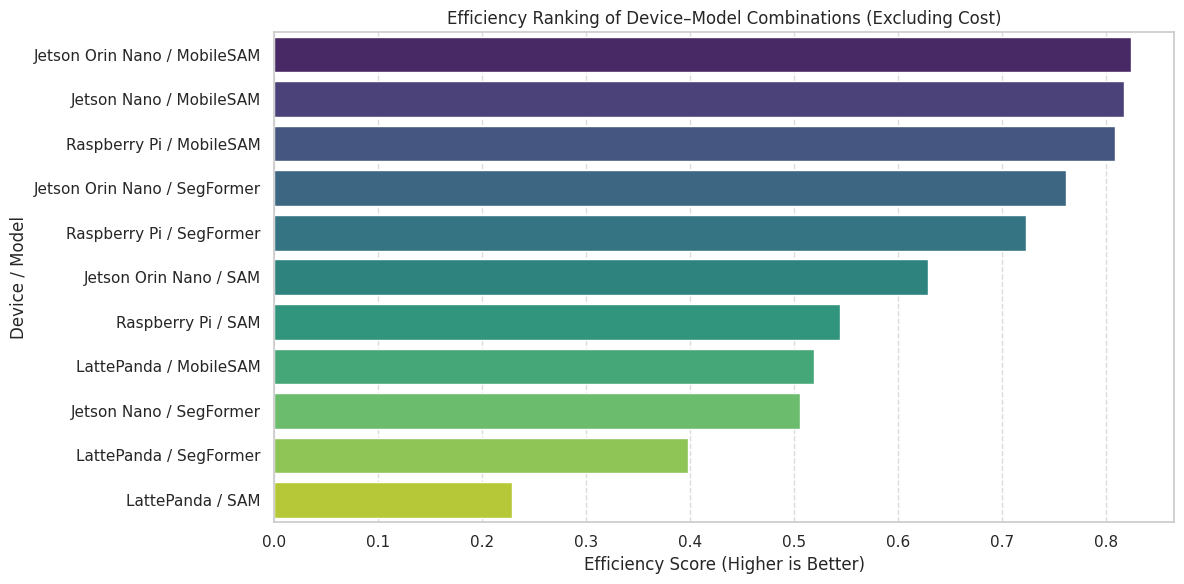

In [32]:
# Bar chart of efficiency scores
plt.figure(figsize=(12, 6))
sns.barplot(
    data=eff_df_sorted,
    x="Efficiency_Score",
    y=eff_df_sorted["Device"] + " / " + eff_df_sorted["Model"],
    palette="viridis"
)

plt.xlabel("Efficiency Score (Higher is Better)")
plt.ylabel("Device / Model")
plt.title("Efficiency Ranking of Device–Model Combinations (Excluding Cost)")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f"efficiency_ranking.png", dpi=300)
plt.show()


/tmp/ipython-input-35-1035302088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


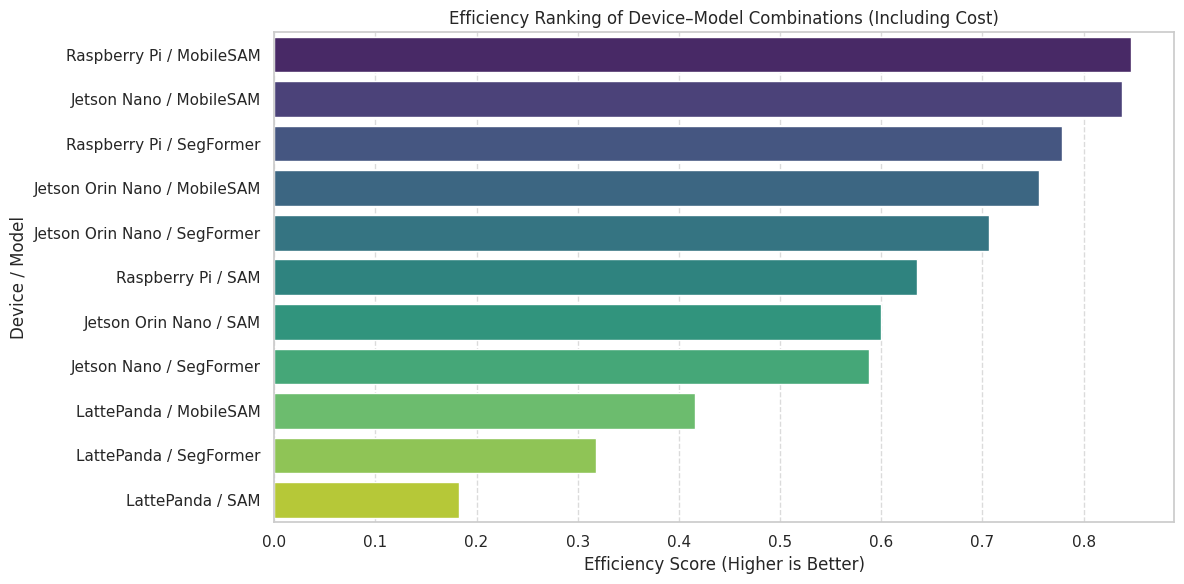

In [35]:
# Bar chart of efficiency scores
plt.figure(figsize=(12, 6))
sns.barplot(
    data=eff_df_sorted,
    x="Efficiency_Score",
    y=eff_df_sorted["Device"] + " / " + eff_df_sorted["Model"],
    palette="viridis"
)

plt.xlabel("Efficiency Score (Higher is Better)")
plt.ylabel("Device / Model")
plt.title("Efficiency Ranking of Device–Model Combinations (Including Cost)")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f"efficiency_ranking_cost.png", dpi=300)
plt.show()


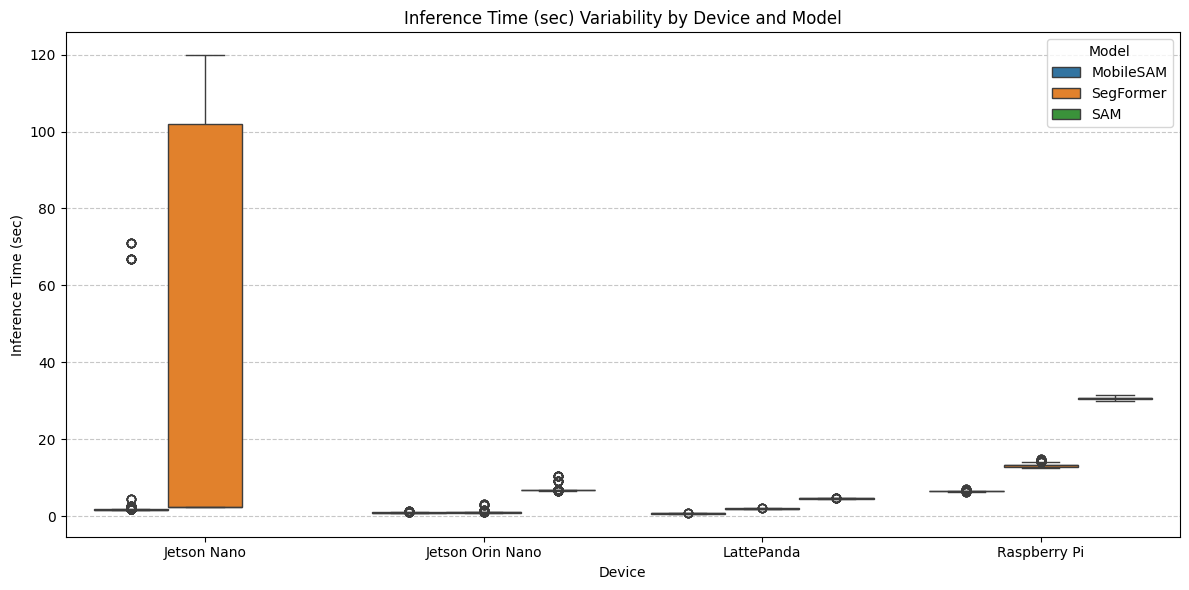

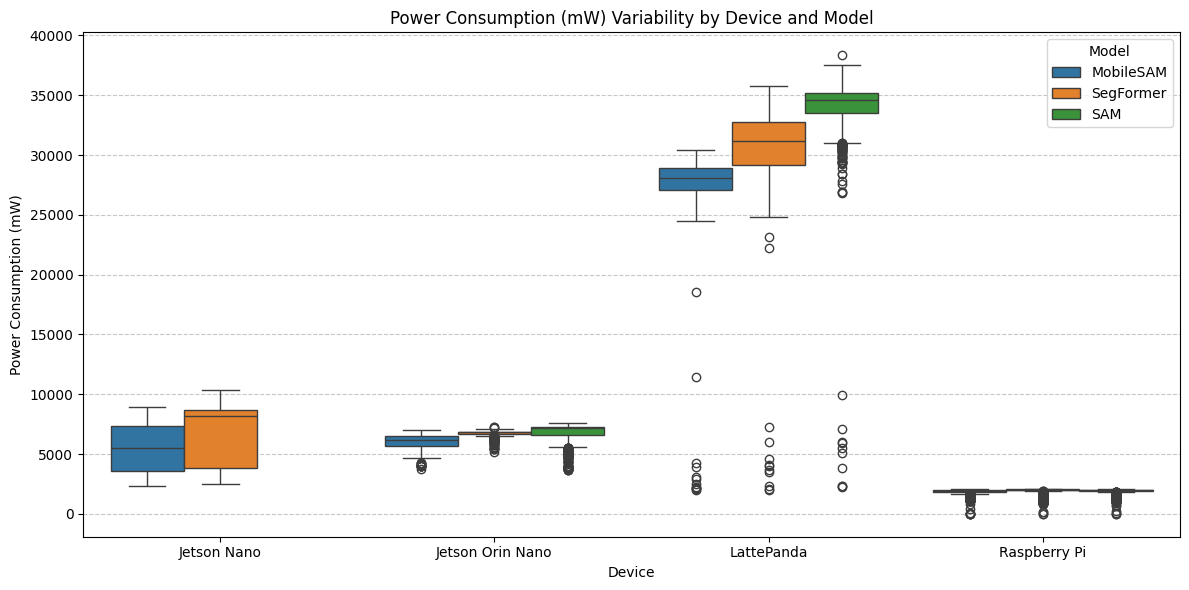

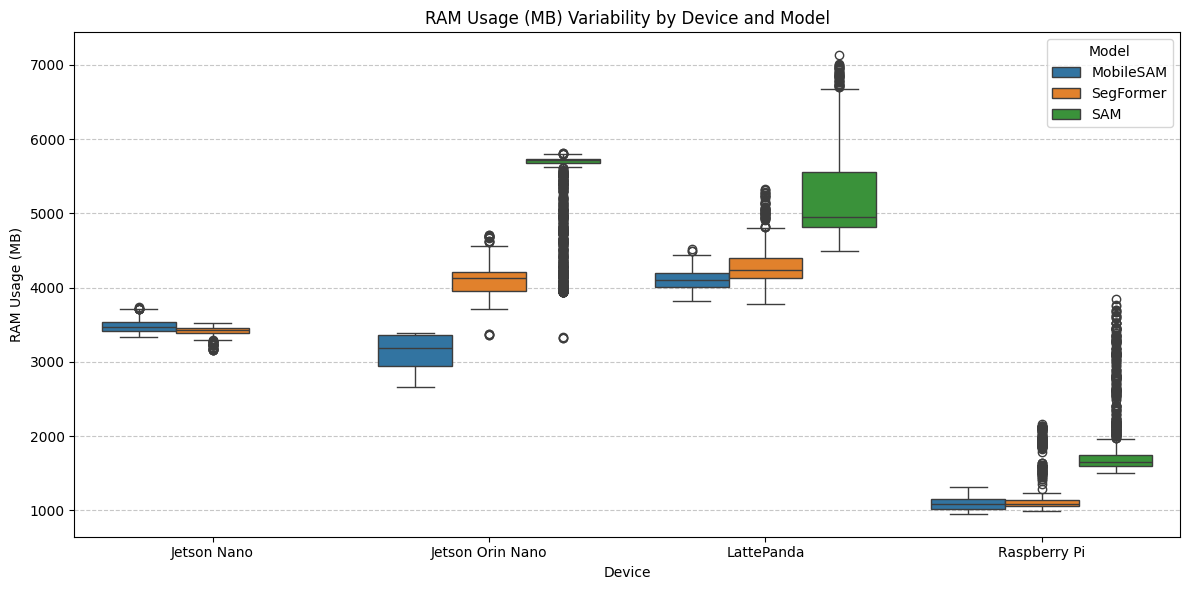

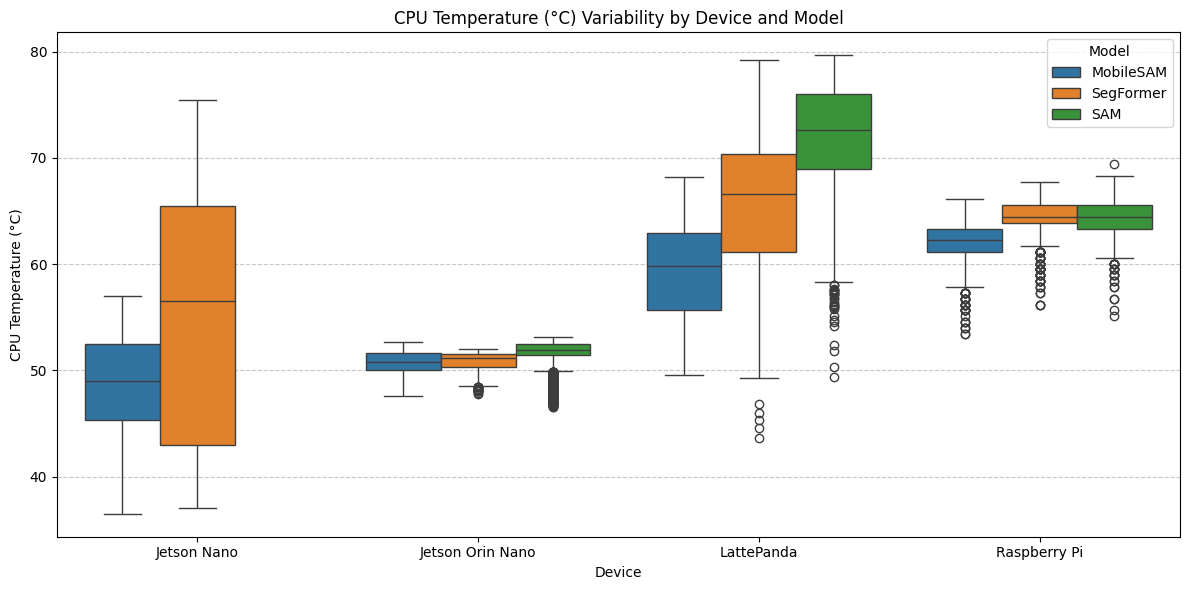

'/content/Variability_Box_Plots.zip'

In [ ]:
# Prepare box plot folder
os.makedirs("variability_box_plots", exist_ok=True)

# Metrics and labels
box_metrics = {
    "Inference_time_sec": "Inference Time (sec)",
    "Power_mW": "Power Consumption (mW)",
    "RAM_MB": "RAM Usage (MB)",
    "Temp_CPU_C": "CPU Temperature (°C)"
}

# Use only during inference
box_df = df[df["Phase"] == "during_inference"].copy()

# Save box plots
for metric, label in box_metrics.items():
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=box_df,
        x="Device",
        y=metric,
        hue="Model"
    )
    plt.title(f"{label} Variability by Device and Model")
    plt.ylabel(label)
    plt.xlabel("Device")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    filename = metric.replace("_", "") + "_variability.png"
    plt.savefig(f"variability_box_plots/{filename}", dpi=300)
    plt.show()
    plt.close()

# Zip the folder
shutil.make_archive("Variability_Box_Plots", 'zip', "variability_box_plots")

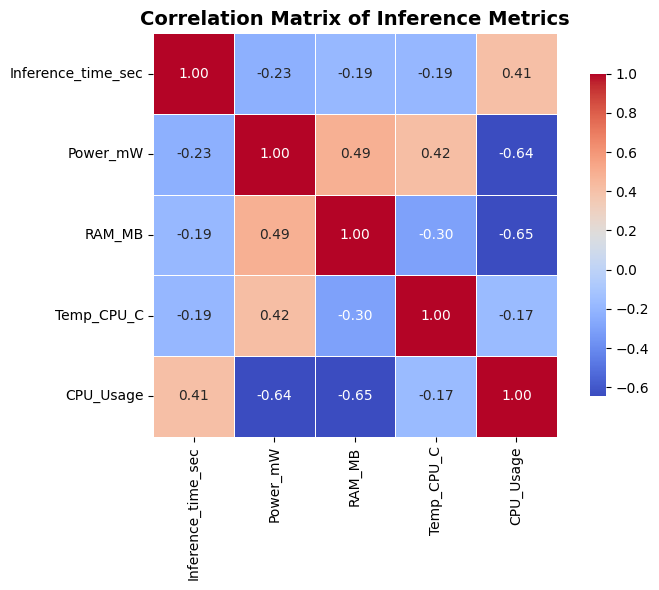

In [ ]:
# Compute correlation matrix on key metrics during inference
corr_df = df[df["Phase"] == "during_inference"][
    ["Inference_time_sec", "Power_mW", "RAM_MB", "Temp_CPU_C", "CPU_Usage"]
].copy()

# Ensure numeric and drop rows with all NaNs
corr_df = corr_df.apply(pd.to_numeric, errors='coerce')
corr_df = corr_df.dropna(how="all")

# Compute correlation
corr_matrix = corr_df.corr(method="pearson")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Inference Metrics", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


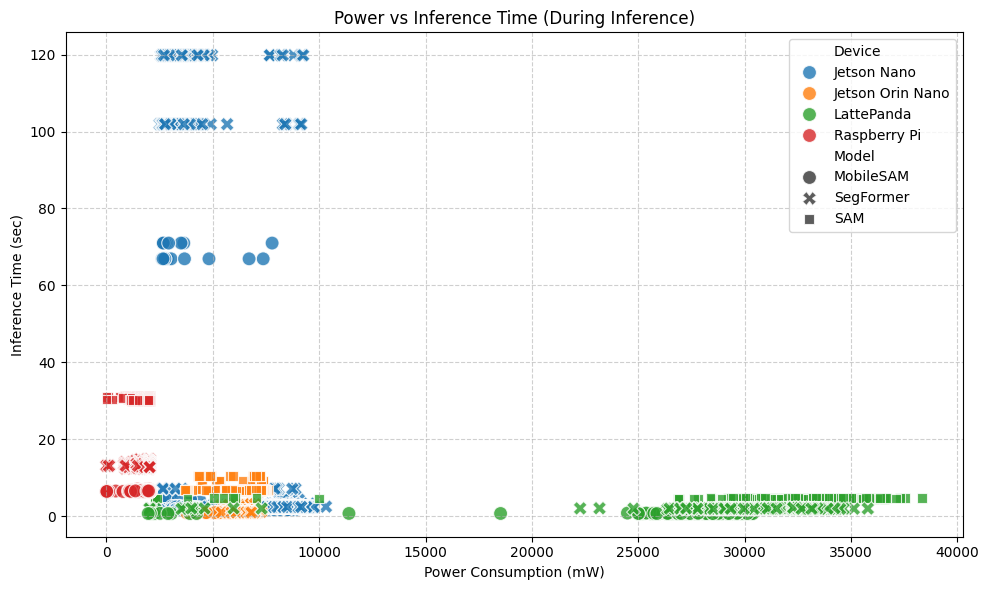

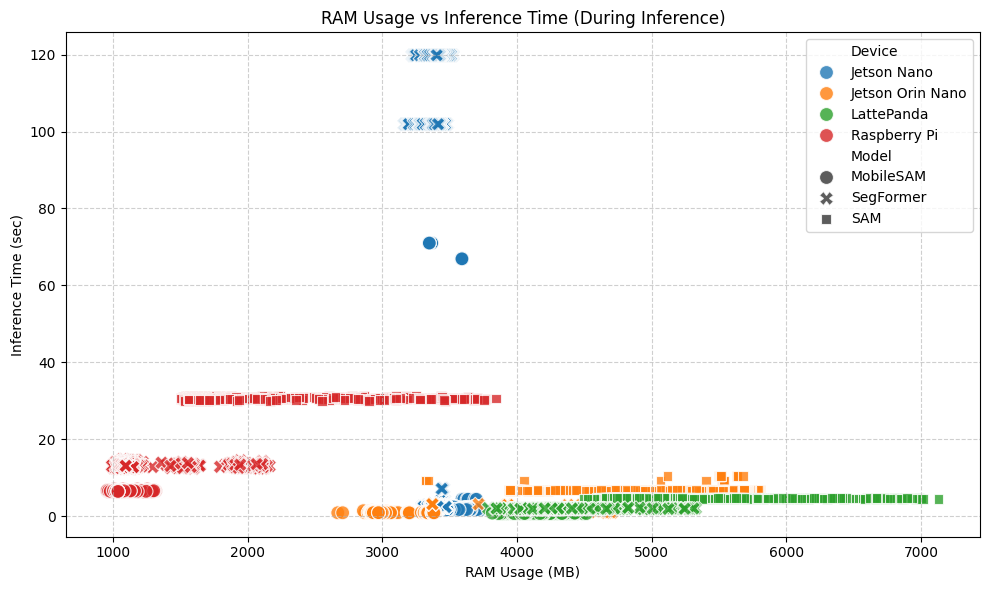

In [ ]:
# Scatter plot: Power vs Inference Time
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[df["Phase"] == "during_inference"],
    x="Power_mW",
    y="Inference_time_sec",
    hue="Device",
    style="Model",
    s=100,
    alpha=0.8
)
plt.title("Power vs Inference Time (During Inference)")
plt.xlabel("Power Consumption (mW)")
plt.ylabel("Inference Time (sec)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Scatter plot: RAM vs Inference Time
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[df["Phase"] == "during_inference"],
    x="RAM_MB",
    y="Inference_time_sec",
    hue="Device",
    style="Model",
    s=100,
    alpha=0.8
)
plt.title("RAM Usage vs Inference Time (During Inference)")
plt.xlabel("RAM Usage (MB)")
plt.ylabel("Inference Time (sec)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


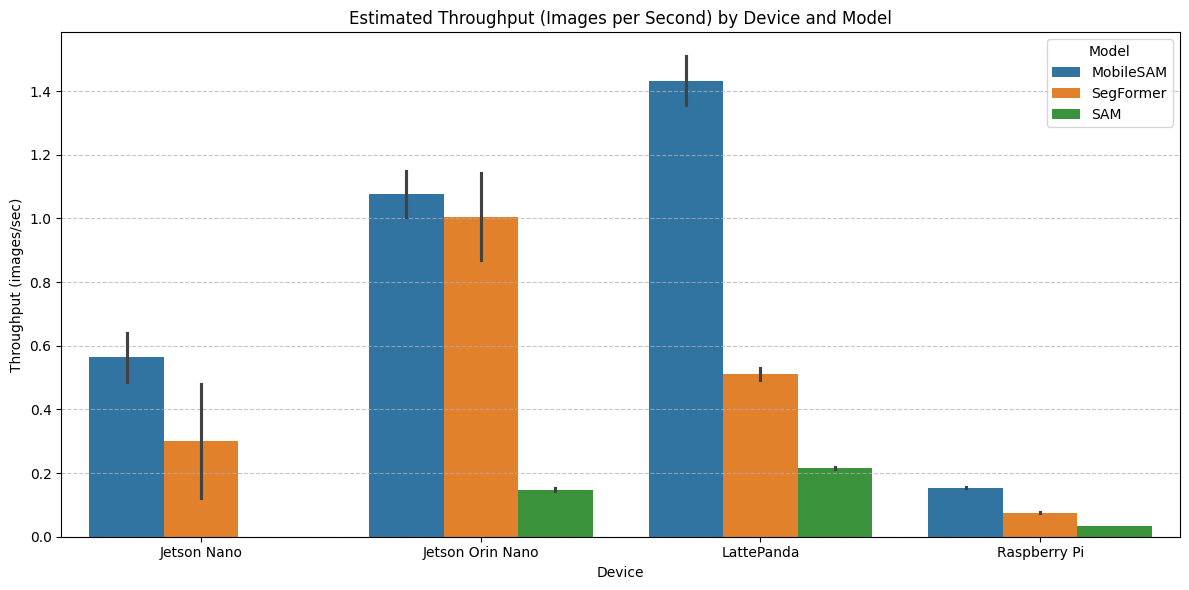

In [ ]:
# Estimate throughput: images per second from inference time
df["Throughput_ips"] = 1 / df["Inference_time_sec"]
throughput_df = df[df["Phase"] == "during_inference"].copy()

# Grouped bar chart: Throughput (images per second)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=throughput_df,
    x="Device",
    y="Throughput_ips",
    hue="Model",
    errorbar="sd"
)
plt.title("Estimated Throughput (Images per Second) by Device and Model")
plt.ylabel("Throughput (images/sec)")
plt.xlabel("Device")
plt.legend(title="Model")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks()
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Filter to during inference only
inference_df = df[df["Phase"] == "during_inference"].copy()

# Step 2: Calculate mean throughput per device-model
inference_df["Throughput_ips"] = 1 / inference_df["Inference_time_sec"]
throughput_df = (
    inference_df.groupby(["Device", "Model"], as_index=False)
    .agg({"Throughput_ips": "mean"})
)

# Step 3: Compute efficiency scores
metrics = ["Inference_time_sec", "Power_mW", "RAM_MB", "Temp_CPU_C"]
eff_df = (
    inference_df.groupby(["Device", "Model"], as_index=False)
    .agg({m: "mean" for m in metrics})
)

# Normalize and invert (higher is better)
for m in metrics:
    min_val = eff_df[m].min()
    max_val = eff_df[m].max()
    eff_df[f"{m}_score"] = 1 - ((eff_df[m] - min_val) / (max_val - min_val))

# Calculate average score
eff_df["Efficiency_Score"] = eff_df[[f"{m}_score" for m in metrics]].mean(axis=1)

# Step 4: Merge throughput and efficiency into final table
final_df = pd.merge(eff_df[["Device", "Model", "Efficiency_Score"]],
                    throughput_df, on=["Device", "Model"])

# Round results
final_df["Efficiency_Score"] = final_df["Efficiency_Score"].round(2)
final_df["Throughput_ips"] = final_df["Throughput_ips"].round(2)

# Sort for readability
final_df = final_df.sort_values(by=["Device", "Model"]).reset_index(drop=True)

final_df

,Device,Model,Efficiency_Score,Throughput_ips
0,Jetson Nano,MobileSAM,0.82,0.56
1,Jetson Nano,SegFormer,0.51,0.30
2,Jetson Orin Nano,MobileSAM,0.82,1.08
3,Jetson Orin Nano,SAM,0.63,0.15
4,Jetson Orin Nano,SegFormer,0.76,1.01
5,LattePanda,MobileSAM,0.52,1.43
6,LattePanda,SAM,0.23,0.22
7,LattePanda,SegFormer,0.40,0.51
8,Raspberry Pi,MobileSAM,0.81,0.15
9,Raspberry Pi,SAM,0.54,0.03


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

# Define human-readable metric labels
metric_labels = {
    "Power_mW": "Power (mW)",
    "Temp_CPU_C": "Temperature (°C)",
    "RAM_MB": "RAM Usage (MB)"
}

# Ensure save directory exists
os.makedirs("final_time_series_plots", exist_ok=True)

# Filter only relevant phase data
df_filtered = df[df["Phase"].isin(["idle", "during_inference"])]
combinations = df_filtered[["Device", "Model", "Site"]].drop_duplicates()

# Store number of generated plots
plot_count = 0

# Loop through each unique device-model-site combo
for _, row in combinations.iterrows():
    device, model, site = row["Device"], row["Model"], row["Site"]

    ts_df = df_filtered[
        (df_filtered["Device"] == device) &
        (df_filtered["Model"] == model) &
        (df_filtered["Site"] == site)
    ][["Power_mW", "Temp_CPU_C", "RAM_MB", "Phase"]].dropna().reset_index(drop=True)

    if ts_df.empty:
        continue

    ts_df["Time Index"] = ts_df.index

    # Initialize figure and axes
    fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
    metrics = ["Power_mW", "Temp_CPU_C", "RAM_MB"]
    colors = {"idle": "orange", "during_inference": "steelblue"}

    for i, metric in enumerate(metrics):
        ax = axs[i]
        ax.set_title(metric_labels[metric])
        ax.set_xlabel("Time Index (sec)")
        ax.set_ylabel(metric_labels[metric])
        labels_drawn = {"idle": False, "during_inference": False}

        # Plot each same-phase segment separately
        start = 0
        while start < len(ts_df):
            phase = ts_df["Phase"].iloc[start]
            end = start
            while end < len(ts_df) and ts_df["Phase"].iloc[end] == phase:
                end += 1
            segment = ts_df.iloc[start:end]
            if not segment.empty:
                ax.plot(segment["Time Index"], segment[metric],
                        color=colors[phase],
                        label=phase if not labels_drawn[phase] else None)
                labels_drawn[phase] = True
            start = end

        ax.grid(True)

    # Unified legend and title
    handles = [mpatches.Patch(color=colors[ph], label=ph) for ph in colors]
    fig.legend(handles=handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 0.95))
    fig.suptitle(f"Time Series Trends for {device} – {model} ({site} Site)", fontsize=16, weight='bold')
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    filename = f"{device}_{model}_{site}.png".replace(" ", "_")
    fig.savefig(f"final_time_series_plots/{filename}", dpi=300)
    plt.show()
    plt.close(fig)
    plot_count += 1

plot_count

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import shutil

# Folder to zip
shutil.make_archive("Time_Series_Plots", 'zip', "final_time_series_plots")

'/content/Time_Series_Plots.zip'